In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')

In [3]:
print(train.shape, test.shape)

(188533, 13) (125690, 12)


测试集有**188533**行数据,训练集有**125690**行数据  
回归方程可选自变量有**11**个

In [14]:
print(train.duplicated().sum(), test.duplicated().sum())

0 0


重复值统计  
train & test 均为0

In [4]:
print(train.isnull().sum(), test.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


**缺失值统计**  
train:  
>fuel_type 5083  
>accident 2452  
>clean_title 21419  

test:  
>fuel_type 3383  
>accident 1632  
>clean_title  14239

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


数据类型  
int64:
>model_year  
>milage  

object:  
>brand  
>model  
>fuel_type  
>engine  
>transmission  
>ext_col  
>int_col  
>accident: None reported = 0,At least 1 accident or damage reported = 1  
>clean_title: Yes

**查看数据最多的15个品牌**

([<matplotlib.patches.Wedge at 0x133a09ac440>,
 [Text(0.9746723241753326, 0.5099155425035167, 'Ford'),
  Text(0.2255668361877854, 1.0766241695281753, 'Mercedes-Benz'),
  Text(-0.5742260339788433, 0.9382241000426969, 'BMW'),
  Text(-1.0423964991623493, 0.35129693783760596, 'Chevrolet'),
  Text(-1.0676139833305016, -0.2649535479988517, 'Audi'),
  Text(-0.8469028061850447, -0.701965552485232, 'Porsche'),
  Text(-0.48666899922155993, -0.9864853193011468, 'Land'),
  Text(-0.08207985579178861, -1.0969334060339302, 'Toyota'),
  Text(0.3150891809869982, -1.0539064512683007, 'Lexus'),
  Text(0.6266436900552257, -0.9040562403490009, 'Jeep'),
  Text(0.8182614752053449, -0.7351517926216142, 'Cadillac'),
  Text(0.9402621475495448, -0.5708827321661762, 'RAM'),
  Text(1.023594945867958, -0.4028068852360547, 'Nissan'),
  Text(1.0747152355446719, -0.23449341672669816, 'Tesla'),
  Text(1.097428317797459, -0.07517371413093385, 'INFINITI')],
 [Text(0.5316394495501813, 0.2781357504564636, '15.3%'),
  Text(

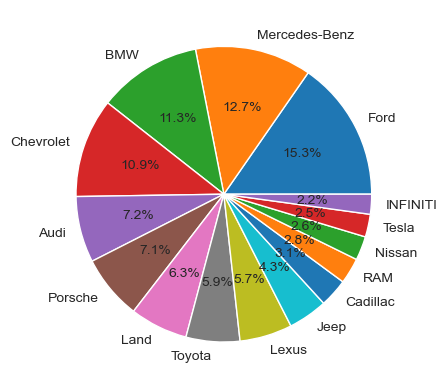

In [25]:
plt.pie(train["brand"].value_counts().values[:15], labels=train["brand"].value_counts().index[:15], autopct='%1.1f%%')

In [6]:
int_attributes = train.select_dtypes(include='int64')
object_attributes = train.select_dtypes(include='object')

In [8]:
int_attributes_test = test.select_dtypes(include='int64')
object_attributes_test = test.select_dtypes(include='object')

In [7]:
for col in object_attributes.columns:
    print(object_attributes[col].value_counts())

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [11]:
for col in object_attributes_test.columns:
    print(object_attributes_test[col].value_counts())

brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2753
Nissan            2674
Tesla             2387
INFINITI          2123
GMC               2094
Dodge             2071
Mazda             1770
Kia               1750
Lincoln           1593
Subaru            1591
Acura             1567
Honda             1436
Hyundai           1308
Volkswagen        1222
Jaguar             934
Bentley            789
MINI               697
Buick              651
Genesis            643
Maserati           619
Volvo              576
Lamborghini        547
Chrysler           514
Alfa               467
Rivian             390
Rolls-Royce        383
Mitsubishi         367
Hummer             342
Pontiac            341
Ferrari            251
McLaren            165
Aston              144
Satur